In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
class Deck:
    def __init__(self, cards):
        self.original_cards = cards[:]
        self.reset()

    def reset(self):
        self.cards = self.original_cards[:]
        random.shuffle(self.cards)

    def flip(self, boost=0):
        '''
        Always flips 2 cards.
        Accepts an optional boost argument (e.g., boost=1 → 3 cards flipped total).
        Boost can be either bold or tough.
        After the initial flip (2 + boost), it checks if any card contains 'w' or 'W'.
        If so, it flips 2 more cards.
        Returns the final list of all flipped cards.
        '''
        flipped = []

        # Flip 2 + boost cards
        for _ in range(2 + boost):
            if self.cards:
                flipped.append(self.cards.pop())

        # If any card contains 'w' or 'W', flip 2 more
        if any('w' in card.lower() for card in flipped):
            for _ in range(2):
                if self.cards:
                    flipped.append(self.cards.pop())

        return flipped

    def remaining(self):
        '''
        Counts the number of cards remaining in the deck.
        '''
        return len(self.cards)

In [5]:
import matplotlib.pyplot as plt
from collections import Counter
import random

class Deck:
    def __init__(self, cards):
        self.original_cards = cards[:]
        self.reset()

    def reset(self):
        self.cards = self.original_cards[:]
        random.shuffle(self.cards)

    def flip(self, boost=0):
        '''
        Always flips 2 cards.
        Accepts an optional boost argument (e.g., boost=1 → 3 cards flipped total).
        Boost can be either bold or tough.
        After the initial flip (2 + boost), it checks if any card contains 'w' or 'W'.
        If so, it flips 2 more cards.
        Returns the final list of all flipped cards.
        '''
        flipped = []

        # Flip 2 + boost cards
        for _ in range(2 + boost):
            if self.cards:
                flipped.append(self.cards.pop())

        # If any card contains 'w' or 'W', flip 2 more
        if any('w' in card.lower() for card in flipped):
            for _ in range(2):
                if self.cards:
                    flipped.append(self.cards.pop())

        return flipped

    def remaining(self):
        '''
        Counts the number of cards remaining in the deck.
        '''
        return len(self.cards)

In [33]:
def count_color_in_flip(flip_result, color):
    """
    Count how many times a given color appears (case-insensitive) in a list of strings.
    """
    return sum(card.lower().count(color.lower()) for card in flip_result)

def run_simulations(deck_template, target_color, n_simulations=10000, boost=0):
    counts = []

    for _ in range(n_simulations):
        deck = Deck(deck_template)  # Reset deck for each run
        flipped = deck.flip(boost=boost)
        count = count_color_in_flip(flipped, target_color)
        counts.append(count)

    return Counter(counts)

def plot_histogram(counter, target_color):
    total = sum(counter.values())
    keys = sorted(counter.keys())
    values = [counter[k] / total * 100 for k in keys]  # Convert counts to percentages

    plt.figure(figsize=(8, 5))
    plt.bar(keys, values, color='skyblue', edgecolor='black')
    plt.xlabel(f"Number of '{target_color}' icons flipped", size=14)
    plt.ylabel("Probability (%)", size=14)
    plt.title(f"Normalized Histogram of '{target_color}' Appearances Across Simulations")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Ensure only integer ticks on x-axis
    plt.xticks(keys)  # keys are already integers from the Counter

    # Add percentage labels above each bar
    for x, y in zip(keys, values):
        plt.text(x, y + 0.5, f"{y:.1f}%", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

In [35]:
cards = 10*['O']+14*['B']+2*['W']+3*['OO']+3*['BB']+8*['w']
deck = Deck(cards)

In [37]:
deck.remaining()

40

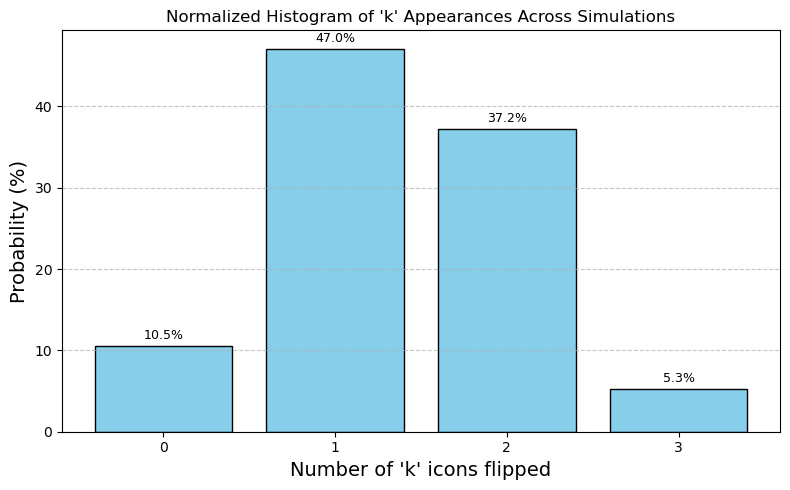

In [45]:
deck_list = ['o','w','KO','b','O','k','Book','WoW','cow','Opal']
target_color = 'k'
boost = 1
results = run_simulations(deck_list, target_color, n_simulations=10000, boost=boost)
plot_histogram(results, target_color)